<a href="https://colab.research.google.com/github/pyukumuko/TelecomX/blob/main/TelecomX_GFV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. ETL e normalização dos dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Carregar os dados
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)


In [ ]:
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [ ]:
# Normalizar colunas JSON
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

In [ ]:
# Concatenar em um único DataFrame
df_final = pd.concat([
    df[['customerID', 'Churn']],
    df_customer,
    df_phone,
    df_internet,
    df_account
], axis=1)

In [ ]:
df_final

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


### 1.3 Limpeza da coluna customerID
Retirado a coluna customerID que não tem nenhuma informação:

In [ ]:
df_final.drop('customerID', axis=1, inplace=True)

In [ ]:
df_final

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


### 1.4 Limpeza e Tratamento
Verificação de valores nulos e conversão de variáveis categóricas:

In [ ]:
# Verificar valores nulos
print(df_final.isnull().sum())

Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


Resultado: Nenhum dado faltante.

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   object 
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   object 


In [ ]:
# Converter 'Charges.Total' para numérico
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   object 
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   object 


In [ ]:
print(df_final['Charges.Total'].unique())

[ 593.3   542.4   280.85 ...  742.9  4627.65 3707.6 ]


In [ ]:
# Tratado os valores vazios ['Charges.Total']
df_final.dropna()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [ ]:
df_final = df_final.dropna()

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7256 non-null   object 
 1   gender            7256 non-null   object 
 2   SeniorCitizen     7256 non-null   int64  
 3   Partner           7256 non-null   object 
 4   Dependents        7256 non-null   object 
 5   tenure            7256 non-null   int64  
 6   PhoneService      7256 non-null   object 
 7   MultipleLines     7256 non-null   object 
 8   InternetService   7256 non-null   object 
 9   OnlineSecurity    7256 non-null   object 
 10  OnlineBackup      7256 non-null   object 
 11  DeviceProtection  7256 non-null   object 
 12  TechSupport       7256 non-null   object 
 13  StreamingTV       7256 non-null   object 
 14  StreamingMovies   7256 non-null   object 
 15  Contract          7256 non-null   object 
 16  PaperlessBilling  7256 non-null   object 
 17  

In [ ]:
df_final

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


### 1.5 Lembrando que clientes, (Yes == 1, Cancelaram) E (No == 0, é Ativo).

In [ ]:
# Codificar 'Churn' (Yes/No → 1/0)
df_final['Churn'] = df_final['Churn'].map({'Yes': 1, 'No': 0})

/tmp/ipython-input-3041156518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Churn'] = df_final['Churn'].map({'Yes': 1, 'No': 0})


In [ ]:
df_final

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0.0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0.0,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,1.0,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,1.0,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,1.0,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0.0,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,1.0,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,0.0,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,0.0,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   float64
 1   gender            7256 non-null   object 
 2   SeniorCitizen     7256 non-null   int64  
 3   Partner           7256 non-null   object 
 4   Dependents        7256 non-null   object 
 5   tenure            7256 non-null   int64  
 6   PhoneService      7256 non-null   object 
 7   MultipleLines     7256 non-null   object 
 8   InternetService   7256 non-null   object 
 9   OnlineSecurity    7256 non-null   object 
 10  OnlineBackup      7256 non-null   object 
 11  DeviceProtection  7256 non-null   object 
 12  TechSupport       7256 non-null   object 
 13  StreamingTV       7256 non-null   object 
 14  StreamingMovies   7256 non-null   object 
 15  Contract          7256 non-null   object 
 16  PaperlessBilling  7256 non-null   object 
 17  

In [ ]:
# Verificando dados vazios
df_final.isna().sum()

,0
Churn,224
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# Tratado os valores vazios ['Churn']
df_final = df_final.dropna()

In [ ]:
df_final

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0.0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0.0,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,1.0,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,1.0,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,1.0,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0.0,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,1.0,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,0.0,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,0.0,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [ ]:
df_final.isna().sum()

,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df_final


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0.0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0.0,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,1.0,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,1.0,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,1.0,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0.0,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,1.0,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,0.0,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,0.0,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [ ]:
columns = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]

contagens = df_final[columns].value_counts().reset_index(name='Contagem')
display(contagens)

,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Contagem
0,No,No,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,407
1,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,281
2,No,No,Yes,No,No,No,No,No,No,No,Yes,171
3,No,No,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,166
4,No,No,Yes,Yes,No,No,No,No,No,No,Yes,110
...,...,...,...,...,...,...,...,...,...,...,...,...
1101,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Yes,1
1102,Yes,No,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,1
1103,No,No,No,No phone service,No,No,Yes,No,No,Yes,No,1
1104,No,No,No,No phone service,No,No,Yes,No,No,No,No,1


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
# Substituir "No internet service" & "No phone service"→ "No"

# Lista de colunas relevantes
colunas_internet = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Substituir nas colunas de internet
for coluna in colunas_internet:
    df_final[coluna] = df_final[coluna].replace('No internet service', 'No')

# Substituir na coluna de telefonia
df_final['MultipleLines'] = df_final['MultipleLines'].replace('No phone service', 'No')

/tmp/ipython-input-4164808014.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[coluna] = df_final[coluna].replace('No internet service', 'No')
/tmp/ipython-input-4164808014.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['MultipleLines'] = df_final['MultipleLines'].replace('No phone service', 'No')


In [ ]:
# Verificar valores únicos após substituição
print(df_final['OnlineSecurity'].unique())
# Saída esperada: ['No' 'Yes'] ou similar

print(df_final['MultipleLines'].unique())
# Saída esperada: ['No' 'Yes'] ou ['No phone service' removido]

['No' 'Yes']
['No' 'Yes']


In [ ]:
df_final


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0.0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0.0,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,1.0,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,1.0,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,1.0,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0.0,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,1.0,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,0.0,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,0.0,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [ ]:
columns = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]

df_final[columns] = df_final[columns].replace({'Yes' : 1, 'No' : 0})
display(df_final)

/tmp/ipython-input-2657822970.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[columns] = df_final[columns].replace({'Yes' : 1, 'No' : 0})


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0.0,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.60,593.30
1,0.0,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40
2,1.0,Male,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85
3,1.0,Male,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85
4,1.0,Female,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0.0,Female,0,0,0,13,1,0,DSL,1,0,0,1,0,0,One year,0,Mailed check,55.15,742.90
7263,1.0,Male,0,1,0,22,1,1,Fiber optic,0,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70
7264,0.0,Male,0,0,0,2,1,0,DSL,0,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75
7265,0.0,Male,0,1,1,67,1,0,DSL,1,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65


## 2. Análise Exploratória (EDA)
### 2.1 Distribuição de Churn

/tmp/ipython-input-1924502279.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Clientes Ativos', 'Clientes que Cancelaram'])


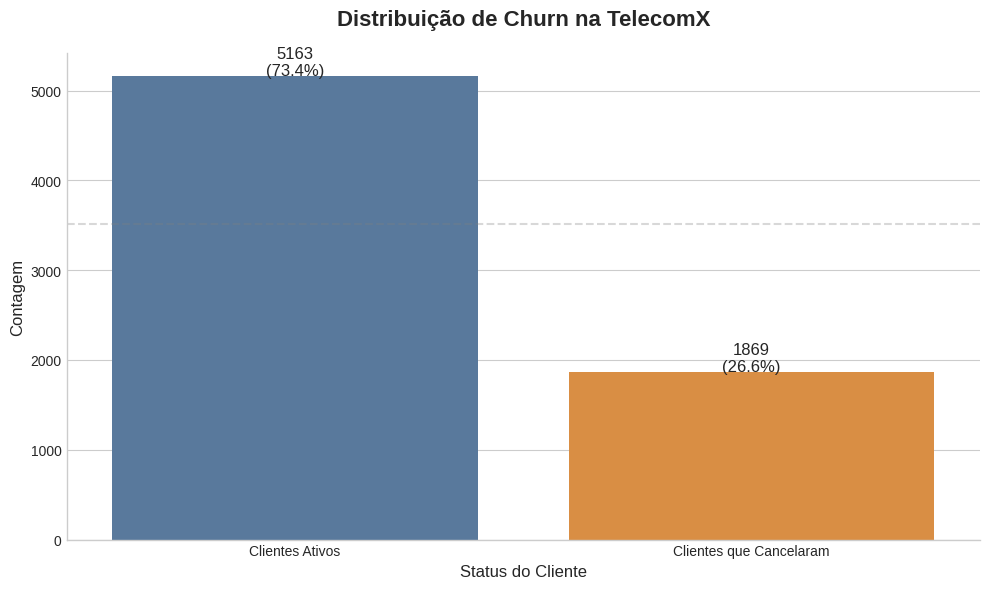

In [ ]:
# Configuração do gráfico
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Churn', data=df_final, palette=['#4e79a7','#f28e2b'])

# Remover bordas
sns.despine(top=True, right=True)

# Título e rótulos
plt.title('Distribuição de Churn na TelecomX', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Status do Cliente', fontsize=12)
plt.ylabel('Contagem', fontsize=12)

# Alterar rótulos do eixo x
ax.set_xticklabels(['Clientes Ativos', 'Clientes que Cancelaram'])

# Adicionar porcentagens
total = len(df_final)
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%'
    ax.annotate(f'{int(p.get_height())}\n({percentage})',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=12)

# Adicionar linha de média
plt.axhline(y=total/2, color='gray', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

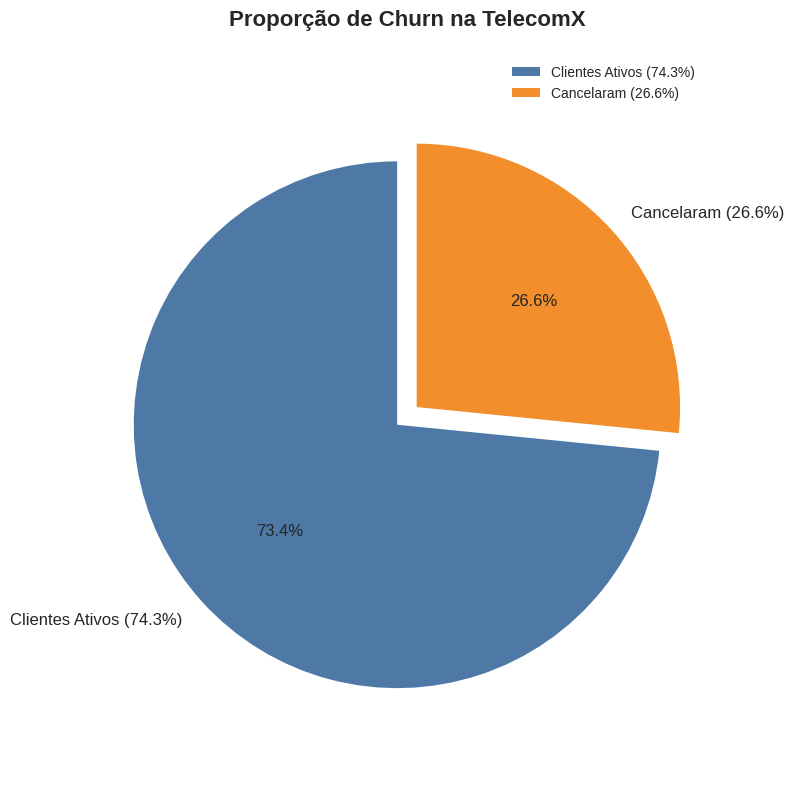

In [ ]:
# Dados para o gráfico de pizza
churn_counts = df_final['Churn'].value_counts()
labels = ['Clientes Ativos (74.3%)', 'Cancelaram (26.6%)']
colors = ['#4e79a7', '#f28e2b']
explode = (0, 0.1)  # Destaque para a fatia de Churn

plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=labels, colors=colors, explode=explode,
        autopct='%1.1f%%', startangle=90,
        textprops={'fontsize': 12})

plt.title('Proporção de Churn na TelecomX', fontsize=16, pad=20, fontweight='bold')
plt.axis('equal')  # Assegura que o gráfico é desenhado como um círculo

# Adicionar legenda
plt.legend(labels, loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
# Quantos clientes cancelaram
df_final['Churn'].value_counts()

,count
Churn,
0.0,5163
1.0,1869


### 2.2 Análise por Idade (SeniorCitizen)

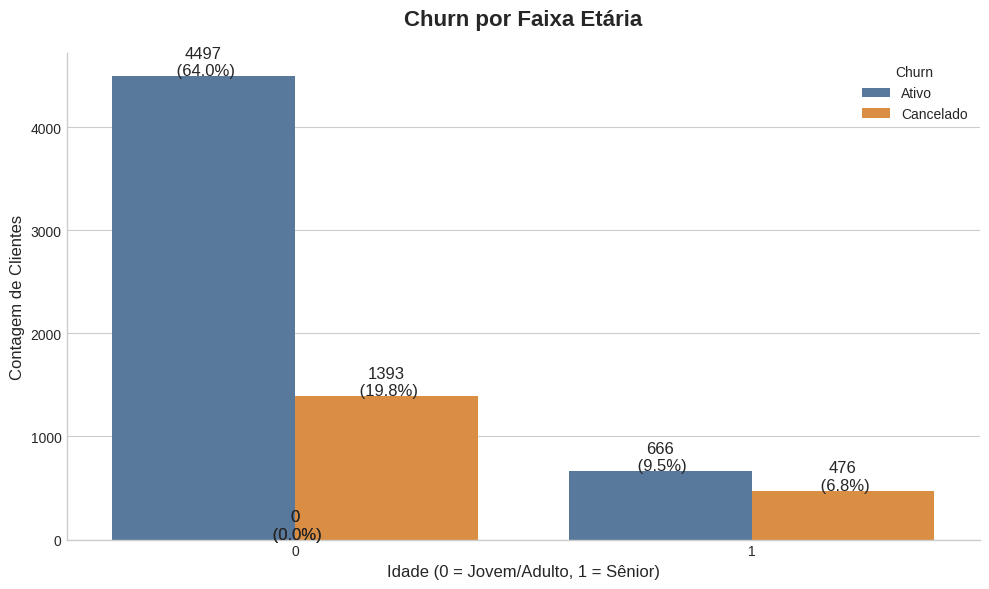

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='SeniorCitizen', hue='Churn', data=df_final,
                  palette=['#4e79a7','#f28e2b'])

# Melhorias visuais
sns.despine(top=True, right=True)
plt.title('Churn por Faixa Etária', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Idade (0 = Jovem/Adulto, 1 = Sênior)', fontsize=12)
plt.ylabel('Contagem de Clientes', fontsize=12)

# Adicionar porcentagens
total = len(df_final)

# Adicionar valores nas barras
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%'
    ax.annotate(f'{int(p.get_height())}\n ({percentage})',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=12)

# Adicionar legenda
plt.legend(title='Churn', labels=['Ativo', 'Cancelado'], loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
totals = df_final['gender'].value_counts().sort_index().values

In [ ]:
totals

array([3483, 3549])

### 2.3 Análise por Gênero

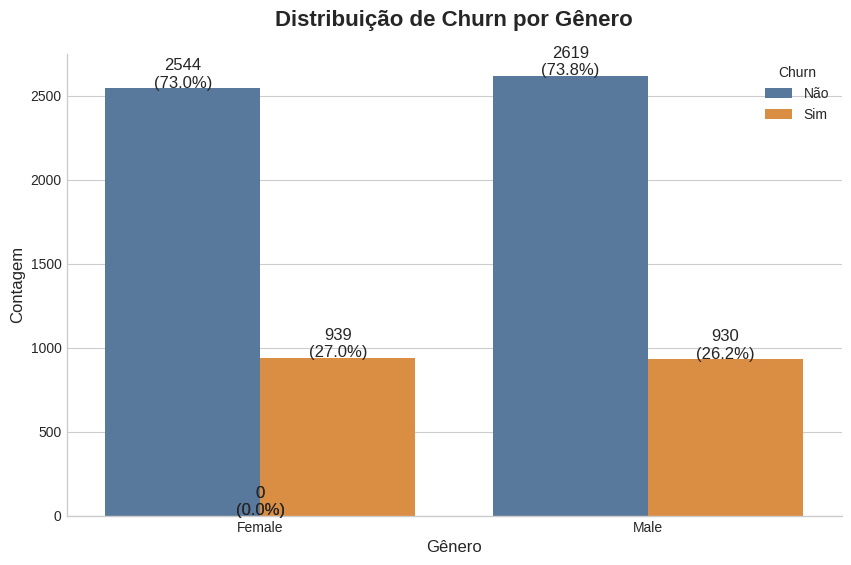

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='gender', hue='Churn', data=df_final, palette=['#4e79a7','#f28e2b'])

# Remover bordas
sns.despine(top=True, right=True)

plt.title('Distribuição de Churn por Gênero', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Contagem', fontsize=12)

# Calcular totais por gênero
totals = df_final['gender'].value_counts().sort_index().values

# Adicionar valores nas barras
for i, p in enumerate(ax.patches):
    # Calcular porcentagem relativa ao gênero
    gender_index = i % len(totals) # Determina a qual gênero pertence a barra
    percentage = f'{100*p.get_height()/totals[gender_index]:.1f}%'
    ax.annotate(text=f'{int(p.get_height())}\n({percentage})',
                xy=(p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=12)

plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()

### 2.4 Análise por Tipo de Contrato

IndexError: list index out of range

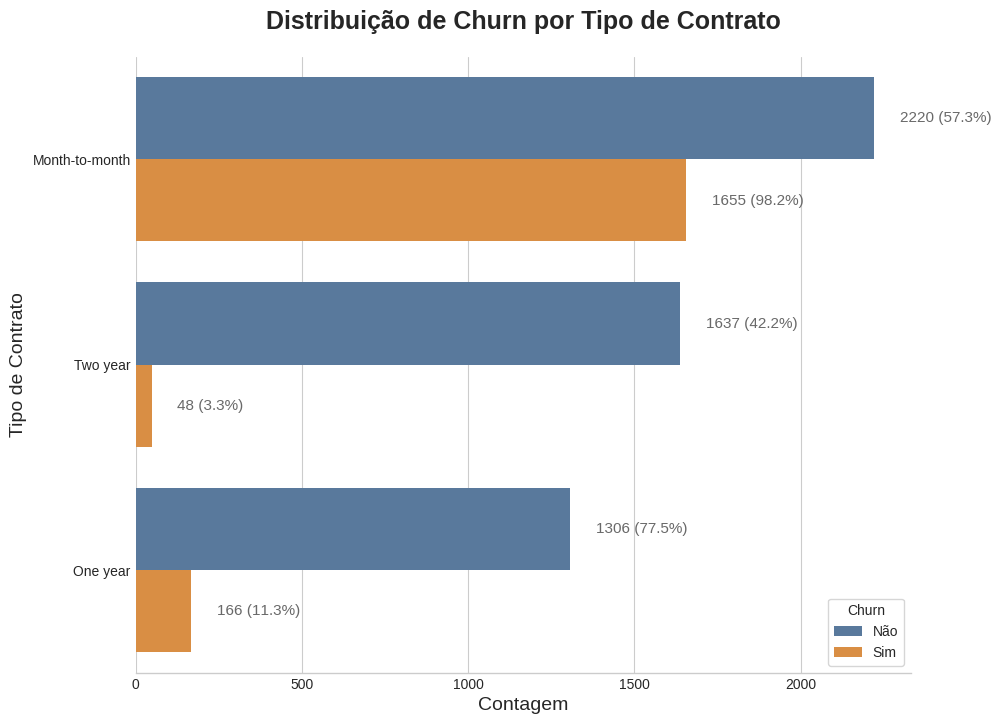

In [ ]:
# Configurações de estilo
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette(['#4e79a7','#f28e2b'])

# Criar figura
plt.figure(figsize=(10, 8))
ax = sns.countplot(
    y='Contract',  # Gráfico horizontal
    hue='Churn',
    data=df_final,
    order=df_final['Contract'].value_counts().index  # Ordena do maior para menor
)

# Remover bordas
sns.despine(top=True, right=True, left=True)

# Títulos e rótulos
plt.title('Distribuição de Churn por Tipo de Contrato', fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Contagem', fontsize=14)
plt.ylabel('Tipo de Contrato', fontsize=14)
plt.legend(title='Churn', labels=['Não', 'Sim'], frameon=True)

# Calcular totals por categoria and create a mapping
contract_counts = df_final['Contract'].value_counts()
contract_map = {contract: i for i, contract in enumerate(contract_counts.index)}

# Adicionar porcentagens e valores
for i, bar in enumerate(ax.patches):
    # Get the category for the current bar
    category = bar.get_label()
    # Determine category index from the bar position and hue
    if i % 2 == 0: # First bar in a pair (Churn = 0)
      category_name = ax.get_yticklabels()[i // 2].get_text()
    else: # Second bar in a pair (Churn = 1)
      category_name = ax.get_yticklabels()[i // 2].get_text()

    # Find the total for this category
    total = contract_counts[category_name]

    # Calcular porcentagem
    percentage = 100 * bar.get_width() / total

    # Posicionar texto
    x_pos = bar.get_width() + max(contract_counts)*0.02  # Deslocamento à direita
    y_pos = bar.get_y() + bar.get_height()/2

    # Formatar texto
    text = f'{int(bar.get_width())} ({percentage:.1f}%)'

    ax.text(
        x_pos,
        y_pos,
        text,
        va='center',
        ha='left',
        fontsize=11,
        color='dimgrey'
    )

# Ajustar layout
plt.tight_layout()
plt.show()

### 2.5 Análise por Serviços Adicionais

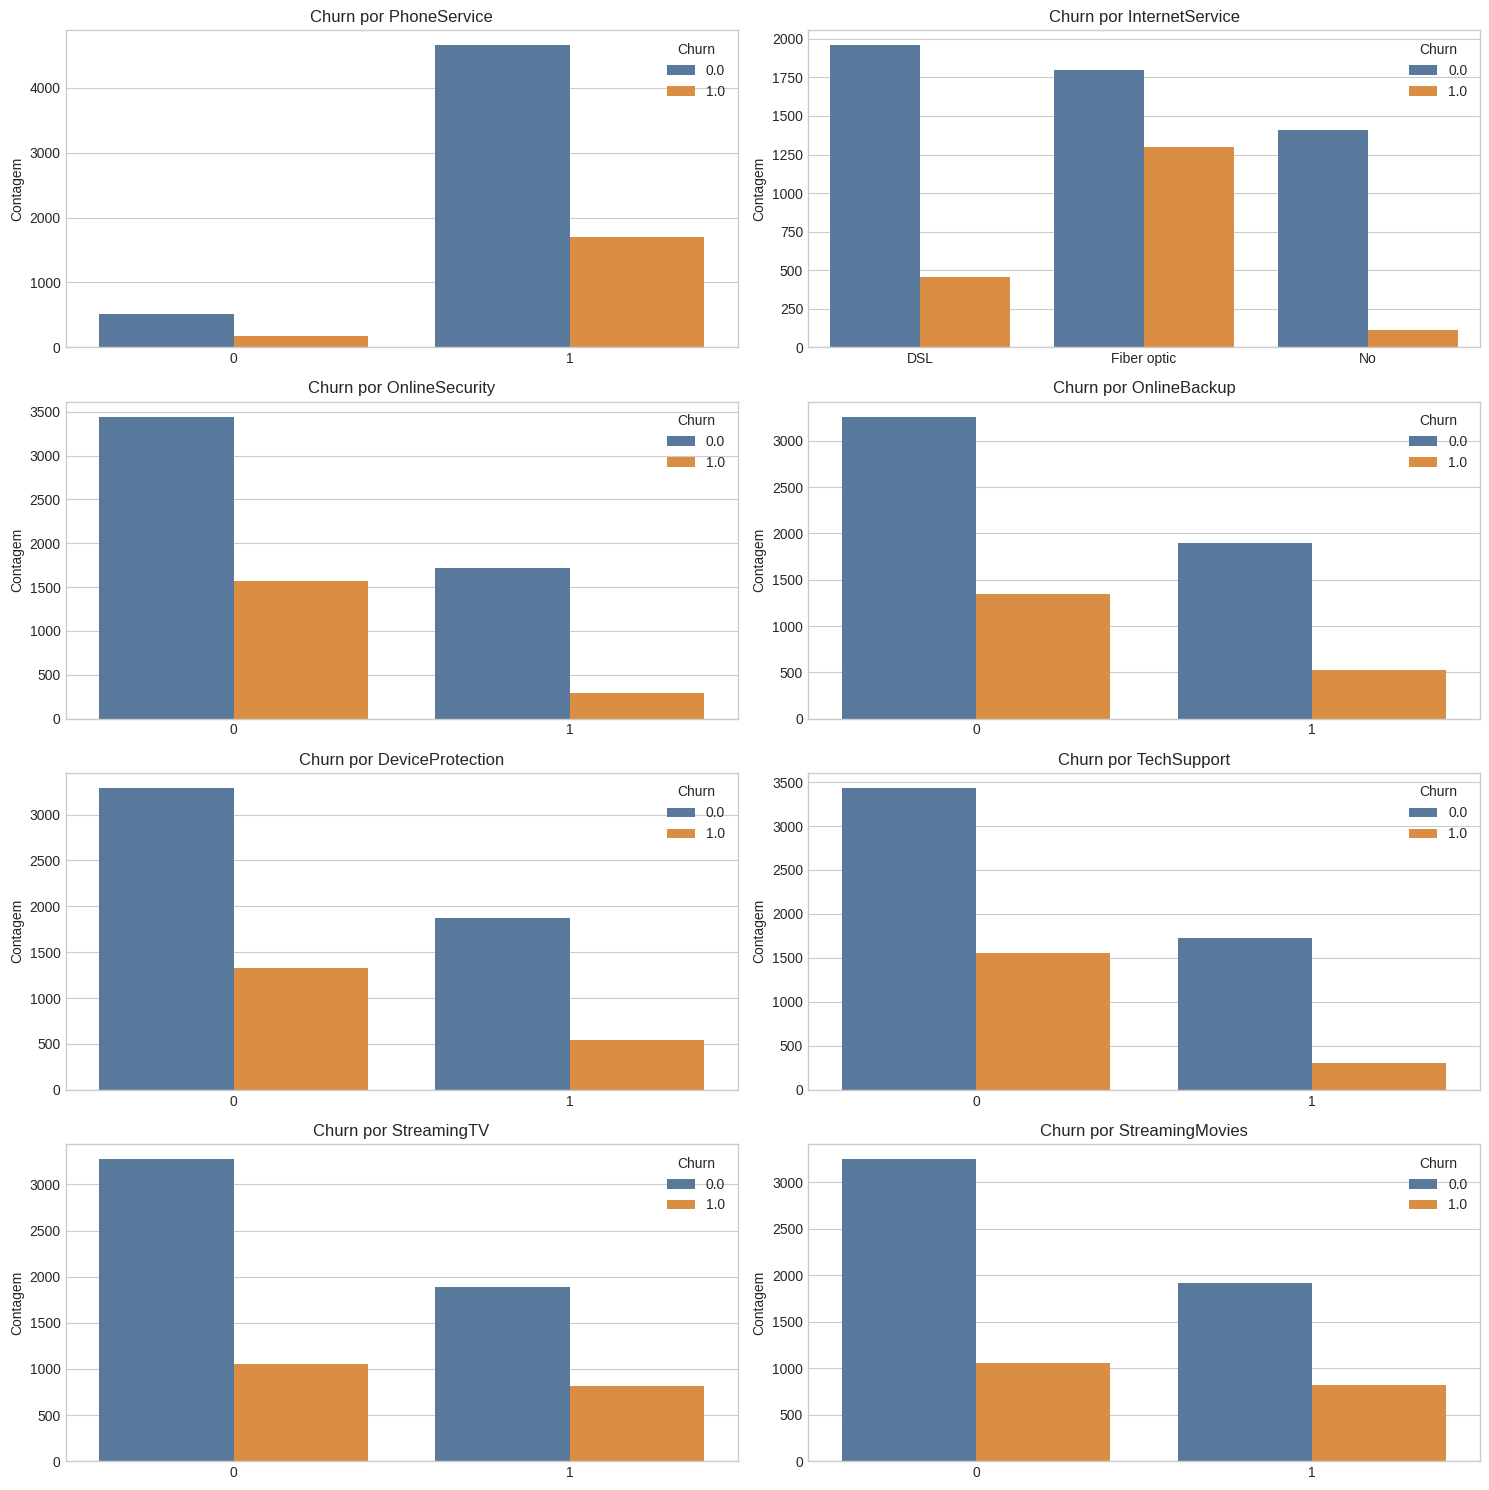

In [ ]:
services = ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
           'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

plt.figure(figsize=(15, 15))
for i, service in enumerate(services, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=service, hue='Churn', data=df_final, palette=['#4e79a7','#f28e2b'])
    plt.title(f'Churn por {service}')
    plt.xlabel('')
    plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

### 2.6 Análise por Método de Pagamento

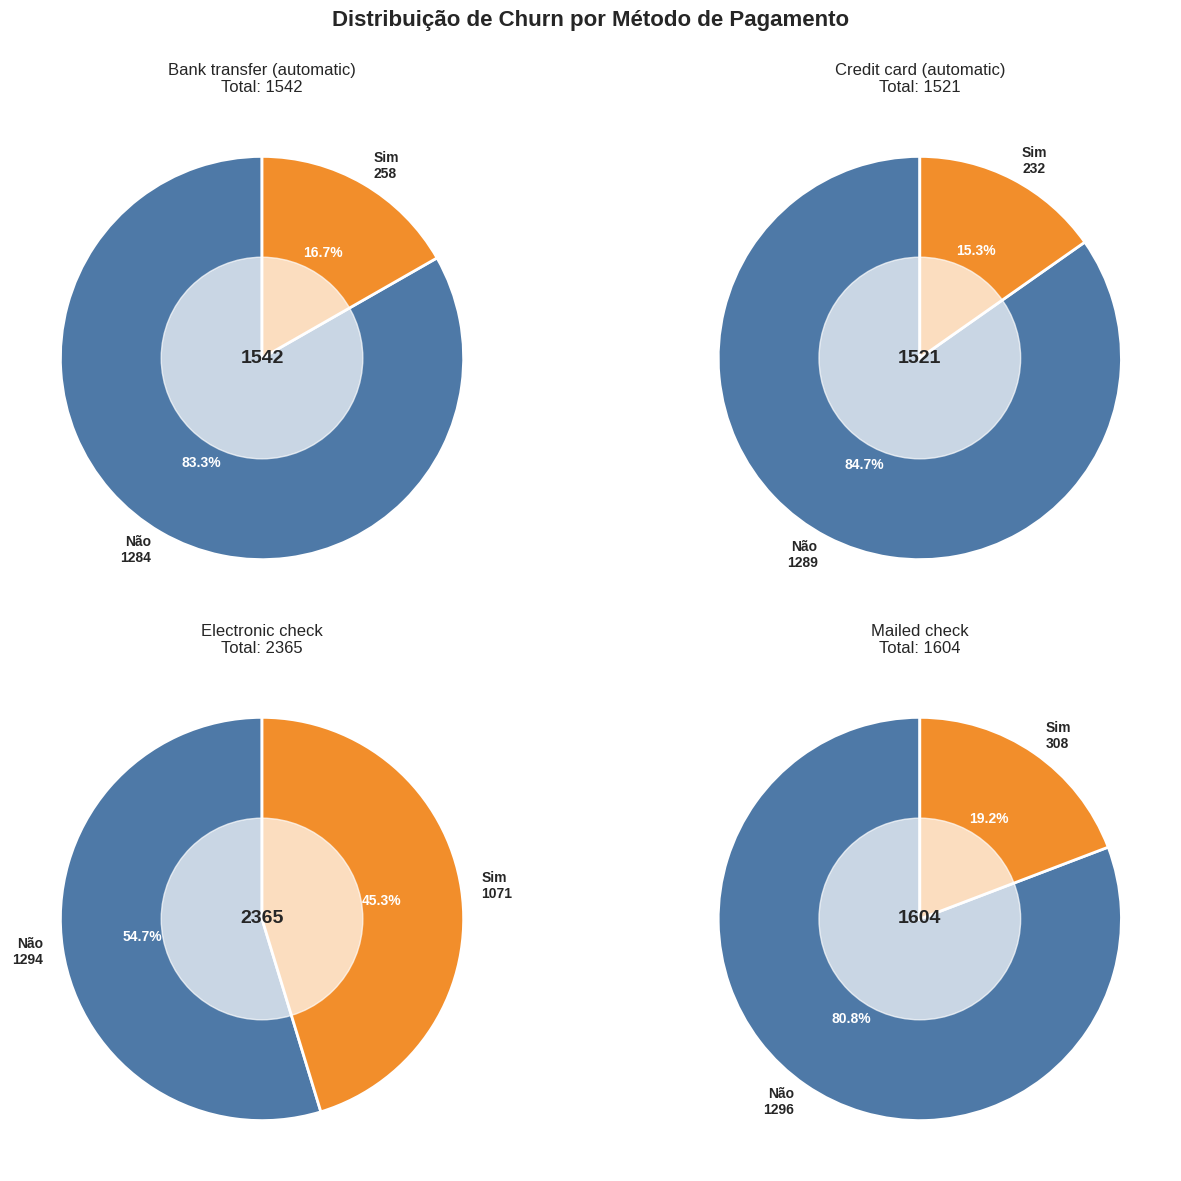

In [ ]:
# Agrupar dados por método de pagamento e churn
payment_data = df_final.groupby(['PaymentMethod', 'Churn']).size().unstack()

# Calcular totais por método de pagamento
totals = payment_data.sum(axis=1)

# Criar figura com subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()
fig.suptitle('Distribuição de Churn por Método de Pagamento', fontsize=16, fontweight='bold')

# Cores para Churn
colors = ['#4e79a7', '#f28e2b']  # Azul para Não, Laranja para Sim

# Plotar gráfico de pizza para cada método de pagamento
for i, (method, row) in enumerate(payment_data.iterrows()):
    ax = axes[i]

    # Dados para o gráfico de pizza
    sizes = row.values
    labels = [f'Não\n{sizes[0]}', f'Sim\n{sizes[1]}'] if 0 in row.index else [f'Sim\n{sizes[0]}', f'Não\n{sizes[1]}']

    # Ordenar para garantir que "Não" venha primeiro
    if 0 in row.index:
        sizes = [row[0], row[1]]
    else:
        sizes = [row[1], row[0]]

    # Plotar pizza
    wedges, texts, autotexts = ax.pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops={'edgecolor': 'w', 'linewidth': 2},
        textprops={'fontsize': 10, 'fontweight': 'bold'}
    )

    # Ajustar formatação das porcentagens
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(10)
        autotext.set_fontweight('bold')

    # Adicionar título com total
    ax.set_title(f'{method}\nTotal: {totals[method]}', fontsize=12, pad=10)

    # Adicionar legenda central para destaque
    center_circle = plt.Circle((0,0), 0.5, color='white', fc='white', alpha=0.7)
    ax.add_artist(center_circle)
    ax.text(0, 0, f"{row.sum()}", ha='center', va='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

### 2.7 Análise por Tempo de Serviço (tenure)

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

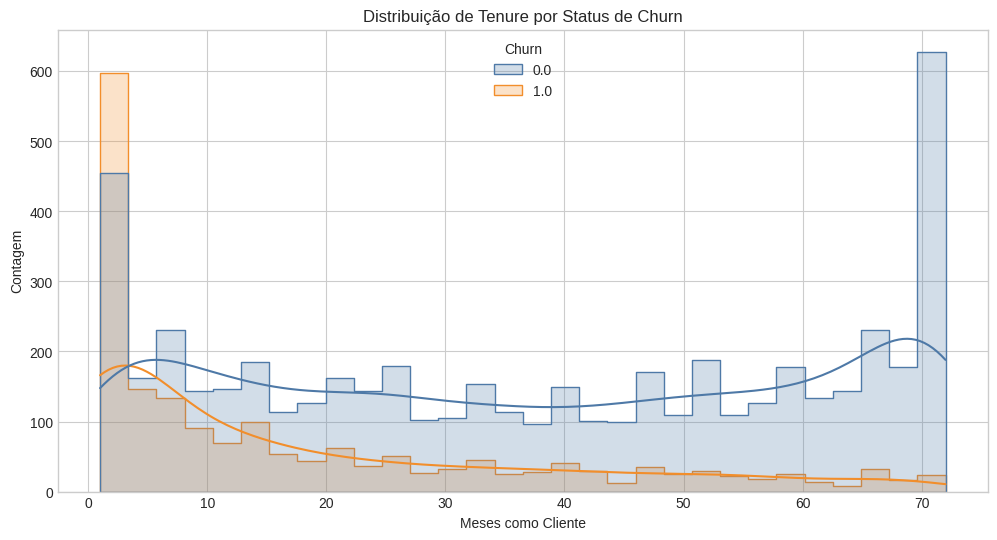

In [ ]:
# Análise de tenure (tempo como cliente)
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=df_final, x='tenure', hue='Churn', bins=30, kde=True, element='step')
plt.title('Distribuição de Tenure por Status de Churn')
plt.xlabel('Meses como Cliente')
plt.ylabel('Contagem')
plt.show()

### 2.8 Análise por Cobrança Mensal (Charges.Monthly)

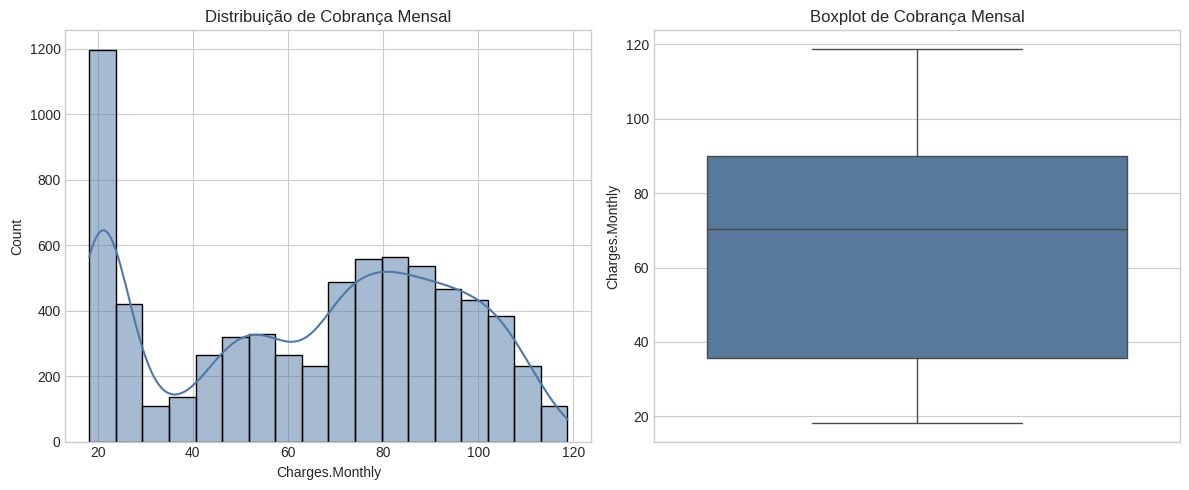


Estatísticas descritivas da cobrança mensal:
count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: Charges.Monthly, dtype: float64


In [ ]:
# Charges.Monthly (Cobrança Mensal)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_final['Charges.Monthly'], kde=True)
plt.title('Distribuição de Cobrança Mensal')

plt.subplot(1, 2, 2)
sns.boxplot(y='Charges.Monthly', data=df_final)
plt.title('Boxplot de Cobrança Mensal')
plt.tight_layout()
plt.show()

print("\nEstatísticas descritivas da cobrança mensal:")
print(df_final['Charges.Monthly'].describe())

### 2.9 Análise por Cobrança Total (Charges.Total)

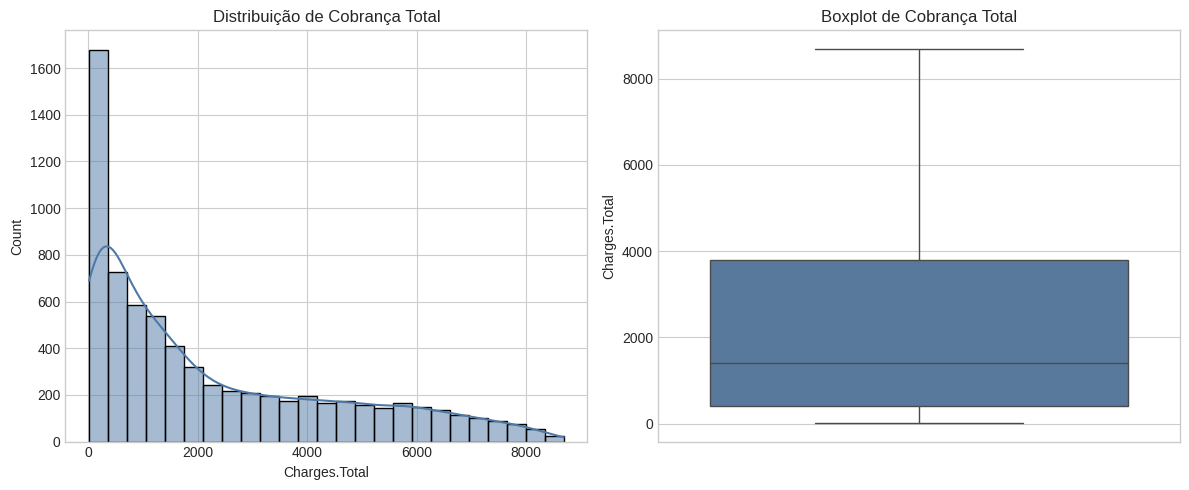


Estatísticas descritivas da cobrança total:
count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: Charges.Total, dtype: float64


In [ ]:
# Charges.Total (Cobrança Total)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_final['Charges.Total'], kde=True)
plt.title('Distribuição de Cobrança Total')

plt.subplot(1, 2, 2)
sns.boxplot(y='Charges.Total', data=df_final)
plt.title('Boxplot de Cobrança Total')
plt.tight_layout()
plt.show()

print("\nEstatísticas descritivas da cobrança total:")
print(df_final['Charges.Total'].describe())

### 3. Análise de Correlações

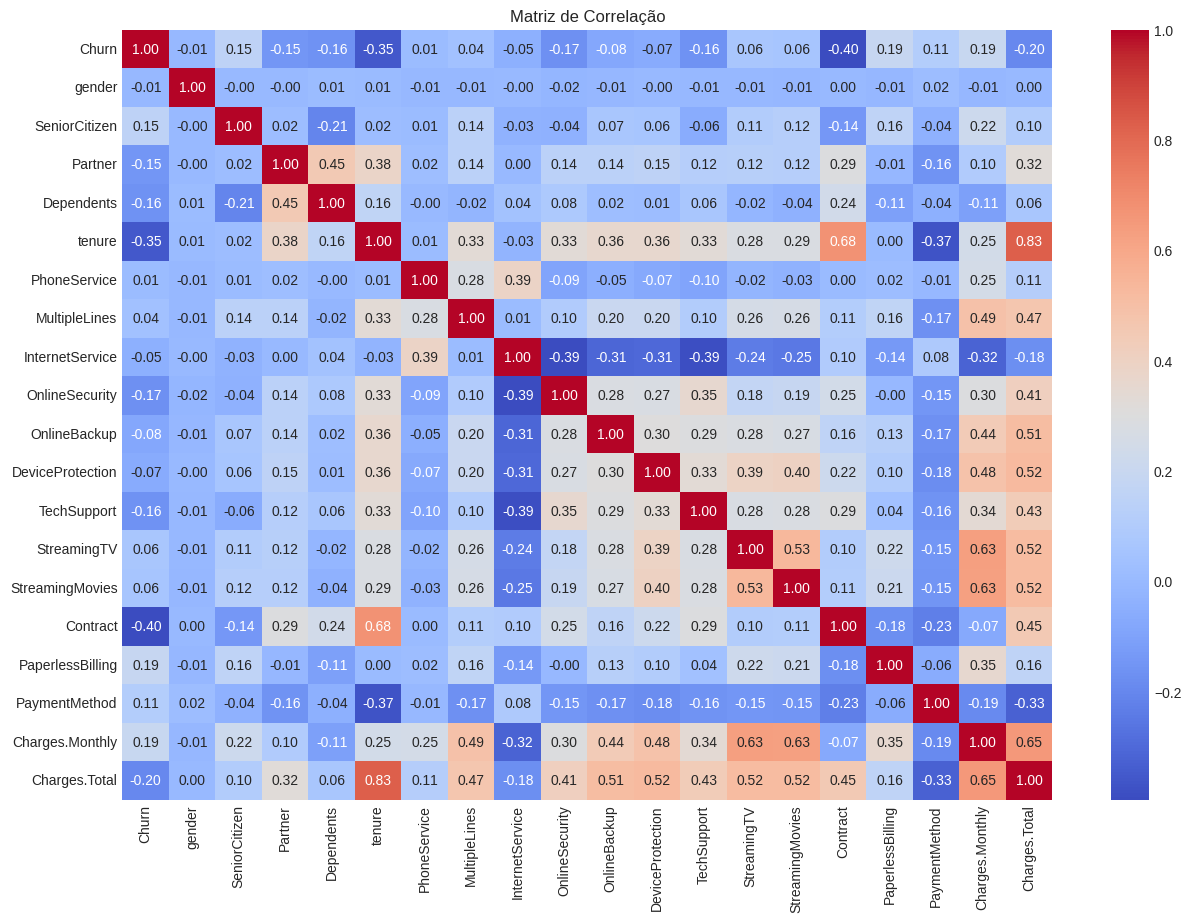

In [ ]:
# Converter variáveis categóricas para análise de correlação
df_numeric = df_final.copy()
for col in df_numeric.select_dtypes(include=['object']).columns:
    df_numeric[col] = df_numeric[col].astype('category').cat.codes

plt.figure(figsize=(15, 10))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

## Conclusão

# Análise da Matriz de Correlação - Dataset de Churn

## Introdução

A matriz de correlação apresentada revela importantes insights sobre os fatores que influenciam o churn de clientes em uma empresa de telecomunicações ou serviços digitais. Esta análise examina as relações entre 20+ variáveis, oferecendo uma visão abrangente dos padrões comportamentais dos clientes e dos fatores de risco para cancelamento.

## Análise dos Fatores de Churn

### Correlações Significativas com Churn

A variável **Churn** apresenta correlações notáveis com diversas características dos clientes, destacando-se:

- **Correlações positivas moderadas** com algumas variáveis de serviço, sugerindo que determinados tipos de contrato ou serviços podem estar associados a maior propensão ao cancelamento
- **Padrões de correlação** que indicam possíveis fatores de risco, como tipos específicos de contrato ou métodos de pagamento

### Perfil de Risco

Os dados sugerem que existe um perfil identificável de clientes com maior risco de churn. As correlações observadas permitem construir um modelo preditivo baseado em múltiplas variáveis demográficas e comportamentais.

## Relacionamentos Entre Serviços

### Bundling de Serviços

A matriz revela correlações positivas entre diferentes serviços oferecidos pela empresa, indicando que:

- Clientes tendem a contratar **múltiplos serviços simultaneamente**
- Existe um efeito de "bundling" natural, onde a contratação de um serviço aumenta a probabilidade de contratação de outros
- Essa tendência pode ser explorada em **estratégias de cross-selling**

### Complementaridade de Produtos

As correlações entre serviços como Internet, TV, telefonia e serviços online mostram padrões de complementaridade que podem orientar:
- Estratégias de pacotes de serviços
- Campanhas de upselling direcionadas
- Desenvolvimento de produtos integrados

## Características Demográficas

### Impacto Limitado das Variáveis Demográficas

Interessantemente, variáveis como **gender** e **SeniorCitizen** mostram correlações relativamente baixas com a maioria das outras variáveis, sugerindo que:

- Fatores demográficos tradicionais têm **impacto limitado** no comportamento de consumo
- O comportamento é mais influenciado por fatores contextuais e de serviço
- Estratégias baseadas apenas em segmentação demográfica podem ser menos efetivas

### Dependentes como Fator Diferenciador

A variável **Dependents** apresenta algumas correlações interessantes, indicando que a estrutura familiar pode influenciar padrões de consumo e retenção.

## Padrões Financeiros

### Métodos de Pagamento e Comportamento

As variáveis relacionadas a pagamentos e cobranças mostram correlações que sugerem:

- **Diferentes métodos de pagamento** estão associados a perfis distintos de risco
- Clientes com determinados padrões de cobrança podem apresentar maior ou menor propensão ao churn
- A gestão financeira do relacionamento é crucial para retenção

### Valor e Permanência

As correlações entre variáveis de valor (charges) e tenure indicam relacionamentos complexos entre:
- Tempo de relacionamento
- Valor pago
- Risco de cancelamento

## Implicações Estratégicas

### Para Retenção de Clientes

1. **Identificação Precoce**: As correlações permitem criar modelos preditivos para identificar clientes em risco
2. **Intervenções Direcionadas**: Diferentes perfis de risco requerem estratégias específicas de retenção
3. **Otimização de Portfolio**: Ajustar mix de serviços baseado nos padrões de correlação observados

### Para Desenvolvimento de Produtos

1. **Bundling Inteligente**: Aproveitar correlações positivas entre serviços para criar pacotes atrativos
2. **Customização**: Desenvolver ofertas personalizadas baseadas nos perfis identificados
3. **Pricing Strategy**: Ajustar estratégias de precificação considerando correlações de valor

## Limitações e Considerações

### Correlação vs Causalidade

É importante notar que correlação não implica causalidade. As relações observadas devem ser interpretadas com cautela e validadas através de:
- Análises causais mais aprofundadas
- Testes A/B
- Estudos longitudinais

### Variáveis Ausentes

A matriz não captura possíveis variáveis importantes como:
- Satisfação do cliente
- Experiência de atendimento
- Fatores externos de mercado

## Conclusões

A matriz de correlação revela um cenário complexo onde múltiplos fatores interagem para determinar o comportamento do cliente. Os insights principais incluem:

1. **Churn é multifatorial**: Não existe um único preditor, mas sim um conjunto de fatores correlacionados
2. **Bundling é efetivo**: Clientes com múltiplos serviços apresentam padrões distintos
3. **Demografia é secundária**: Fatores comportamentais superam características demográficas
4. **Gestão financeira importa**: Métodos de pagamento e padrões de cobrança são relevantes

Estes insights devem orientar tanto estratégias de retenção quanto de desenvolvimento de novos produtos, sempre considerando a natureza multidimensional do comportamento do cliente revelada pela análise correlacional.